# Causes of Death in Finland - Overview

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from pathlib import Path
from src import settings
%matplotlib inline
plt.style.use('seaborn')

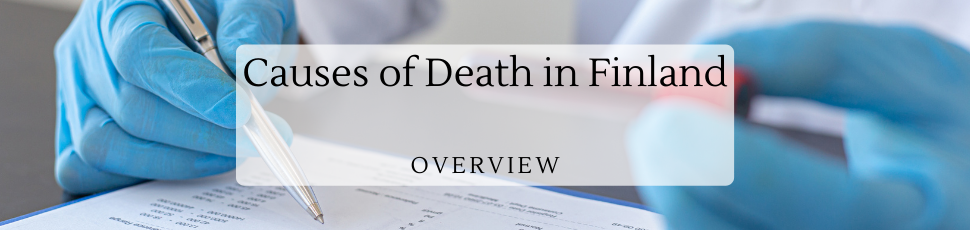

In [2]:
Image(filename=settings.REFERENCES_PATHS['IMG'] / 'COD.png', width=1000)

## 1. Import and clean the data

In [3]:
# Import data
df = pd.read_csv(settings.DATA_PATHS['PROCESSED'] / 'statfin_ksyyt_pxt_11bs_2021-01-31.csv', index_col=0)
df.head()

,Underlying cause of death (54-group short list),Age,Gender,Year,Information,value
0,"01 Tuberculosis (A15-A19, B90, J65)",0,Males,2010,Deaths,1
1,"01 Tuberculosis (A15-A19, B90, J65)",0,Males,2011,Deaths,0
2,"01 Tuberculosis (A15-A19, B90, J65)",0,Males,2012,Deaths,0
3,"01 Tuberculosis (A15-A19, B90, J65)",0,Males,2013,Deaths,0
4,"01 Tuberculosis (A15-A19, B90, J65)",0,Males,2014,Deaths,0


In [4]:
# Remove "Information" column because there is no observations
df.drop('Information', inplace=True, axis=1)

# Rename columns for clarity
df.rename(columns={'Underlying cause of death (54-group short list)': 'Cause_of_death', 'value': 'Deaths'}, inplace=True)

# Change "Age" as categorical variable
df.Age = df.Age.astype('category')

# Reorder "Age" categories
df.Age.cat.reorder_categories(['0', '1 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29',
        '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59',
        '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89',
        '90 - 94', '95 -'], inplace=True)

In [5]:
# Check the data
df.head(), df.dtypes

(                        Cause_of_death Age Gender  Year  Deaths
 0  01 Tuberculosis (A15-A19, B90, J65)   0  Males  2010       1
 1  01 Tuberculosis (A15-A19, B90, J65)   0  Males  2011       0
 2  01 Tuberculosis (A15-A19, B90, J65)   0  Males  2012       0
 3  01 Tuberculosis (A15-A19, B90, J65)   0  Males  2013       0
 4  01 Tuberculosis (A15-A19, B90, J65)   0  Males  2014       0,
 Cause_of_death      object
 Age               category
 Gender              object
 Year                 int64
 Deaths               int64
 dtype: object)

## 2. Explore the data

### 2.1 Most common causes of death in Finland during 2010s by Year

#### 2.1.1 Pivot table

In [6]:
# Create pivot table with margins
df_pivot_year = df.pivot_table(index=['Cause_of_death'], columns='Year', values='Deaths', aggfunc='sum', margins=True, \
                          margins_name='Total').nlargest(11, columns='Total')
df_pivot_year

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Cause_of_death,,,,,,,,,,,
Total,50910,50568,51737,51478,52409,52302,53964,53670,54523,53962,525523
27 Ischaemic heart diseases (I20-I25),11767,11169,11099,10552,10337,10209,10183,9861,9453,8630,103260
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",6057,6200,7056,7543,8116,8580,9175,9390,10120,10153,82390
29 Cerebrovascular diseases (I60-I69),4235,4346,4498,4419,4428,4299,4378,4044,4043,3991,42681
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",2443,2492,2642,2771,2946,3089,3268,3417,3565,3957,30590
"11 Malignant neoplasm of larynx, trachea, bronchus and lung (C32-C34)",2260,2144,2203,2259,2192,2275,2309,2310,2318,2383,22653
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",2030,2150,1971,1806,1844,1768,1836,1755,1766,1689,18615
41 Alcohol-related diseases and accidental poisoning by alcohol,1962,1889,1960,1926,1841,1666,1730,1558,1683,1718,17933
21 Other malignant neoplasms,1624,1681,1683,1752,1745,1796,1818,1896,1883,1931,17809


#### 2.1.2 Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '2010'),
  Text(1.5, 0, '2011'),
  Text(2.5, 0, '2012'),
  Text(3.5, 0, '2013'),
  Text(4.5, 0, '2014'),
  Text(5.5, 0, '2015'),
  Text(6.5, 0, '2016'),
  Text(7.5, 0, '2017'),
  Text(8.5, 0, '2018'),
  Text(9.5, 0, '2019')])

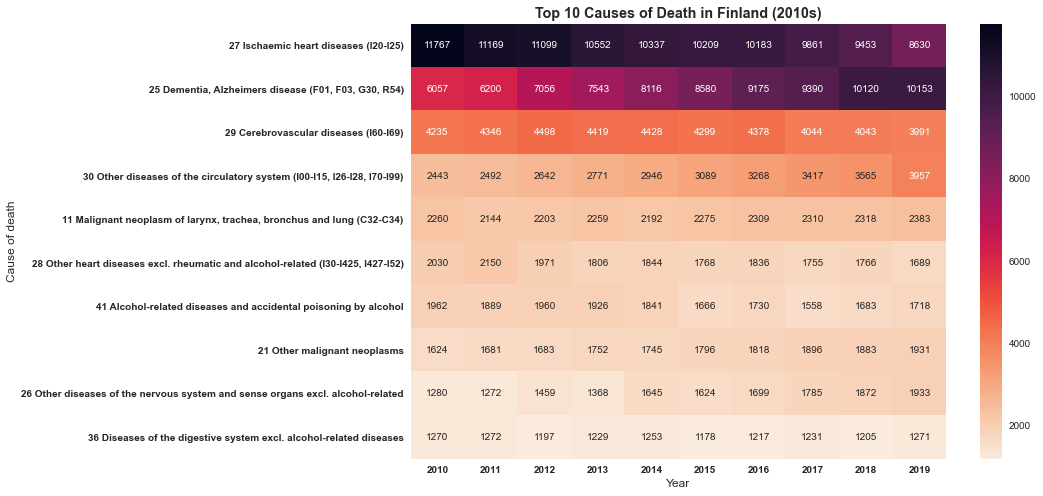

In [7]:
# Drop margins from pivot table
df_pivot_nomargins = df_pivot_year.drop('Total').drop('Total', axis=1)

# Draw heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_pivot_nomargins, cmap='rocket_r', annot=True, fmt='d')
plt.title('Top 10 Causes of Death in Finland (2010s)', fontsize='x-large', weight='bold')
plt.ylabel('Cause of death', fontsize='large')
plt.yticks(fontsize='medium', weight='bold')
plt.xlabel('Year', fontsize='large')
plt.xticks(fontsize='medium', weight='bold')

#### 2.1.3 Findings
**Top 5 causes of death during 2010s** 
1. Ischaemic heart diseases
2. Dementia, Alzheimers disease 
3. Cerebrovascular diseases 
4. Other diseases of the circulatory system
5. Malignant neoplasm of larynx, trachea, bronchus and lung

- __*Ischaemic heart diseases*__ was the most common cause of death for a whole decade and it was most common cause of death each year until 2018. 
- In 2018, __*Dementia, Alzheimers disease*__ caused more deaths than __*Ischaemic heart diseases*__ and it become most common cause of death in Finland. 
- During 2010s, deaths caused by __*Ischaemic heart diseases*__ has been decreasing every year when __*Dementia, Alzheimers disease*__ cases has been increasing.

### 2.2 Most common causes of death in Finland during 2010s by Gender

#### 2.2.1 Pivot table

In [8]:
# Create pivot table by gender with margins
df_pivot_gender = df.pivot_table(index=['Cause_of_death'], columns='Gender', values='Deaths', aggfunc='sum', margins=True, \
                          margins_name='Total').nlargest(11, columns='Total')
df_pivot_gender

Gender,Females,Males,Total
Cause_of_death,,,
Total,263552,261971,525523
27 Ischaemic heart diseases (I20-I25),47152,56108,103260
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",56143,26247,82390
29 Cerebrovascular diseases (I60-I69),24835,17846,42681
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",17977,12613,30590
"11 Malignant neoplasm of larynx, trachea, bronchus and lung (C32-C34)",7584,15069,22653
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",9317,9298,18615
41 Alcohol-related diseases and accidental poisoning by alcohol,4144,13789,17933
21 Other malignant neoplasms,9530,8279,17809


#### 2.2.2 Bar chart

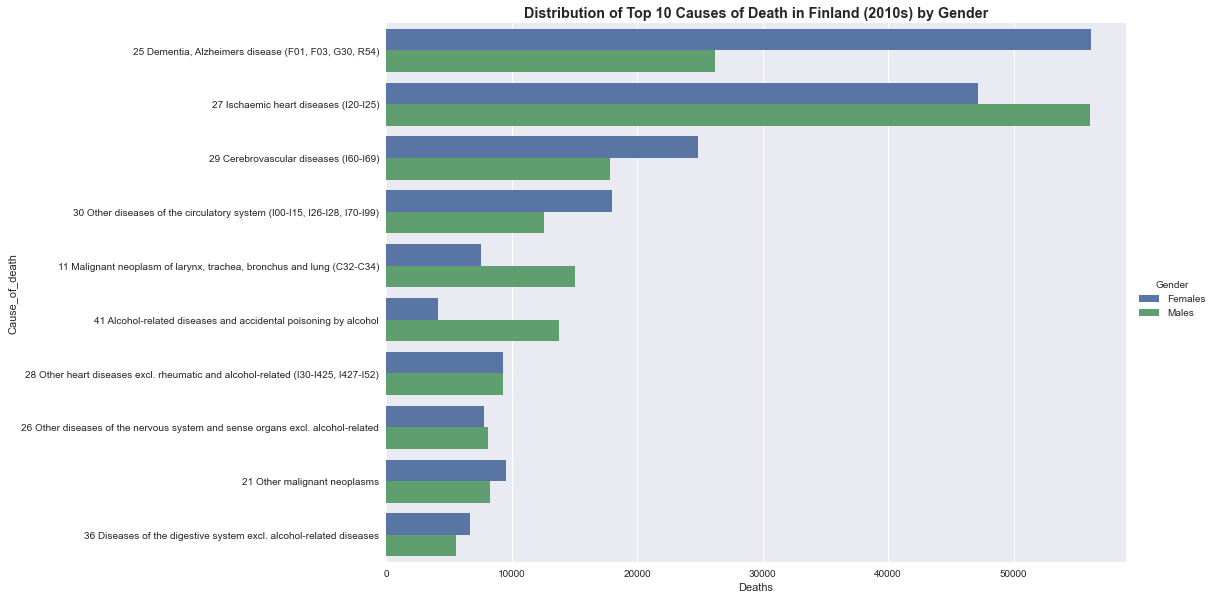

In [19]:
# Filter most common causes of deaths
most_common = df_pivot_gender.index.tolist()[1:]    # Exclude "Total" from index names
df_common = df[df.Cause_of_death.isin(most_common)].sort_values('Deaths', ascending=False)

sns.catplot(x='Deaths', y='Cause_of_death', hue='Gender', data=df_common, kind='bar', height=8, aspect=2, estimator=sum, ci=None)
plt.title('Distribution of Top 10 Causes of Death in Finland (2010s) by Gender', fontsize='x-large', weight='bold')

#### 2.2.3 Findings
**Most common cause of death by gender**
- Females: __*Dementia, Alzheimers disease*__
- Males: __*Ischaemic heart diseases*__

**Remarkable findings**
- __*Dementia, Alzheimers disease*__ is significantly more common cause of death among females than males. __*Ischaemic heart diseases*__ is more common among males but the difference is not that significant.
- __*Alcohol-related diseases and accidental poisoning by alcohol*__ are significantly more common among males than females.

### 2.3 Deaths distribution in Finland during 2010s by Age and Gender

#### 2.3.1 Pivot table

In [10]:
# Create pivot table by gender with margins
df_pivot_age = df.pivot_table(index=['Gender'], columns='Age', values='Deaths', aggfunc='sum', margins=True, \
                          margins_name='Total').nlargest(11, columns='Total')
df_pivot_age

Age,0,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 -,Total
Gender,,,,,,,,,,,,,,,,,,,,,
Total,1138,318,230,272,1026,1885,2213,2533,3112,4415,...,20087,31859,43019,49783,62755,85037,98314,69347,27918,525523
Females,515,139,113,131,319,510,547,675,875,1310,...,6436,10364,14843,18541,26842,43070,60087,49342,22378,263552
Males,623,179,117,141,707,1375,1666,1858,2237,3105,...,13651,21495,28176,31242,35913,41967,38227,20005,5540,261971


#### 2.3.2 Bar chart

Text(0.5, 1.0, 'Deaths distribution in Finland during 2010s by Age and Gender')

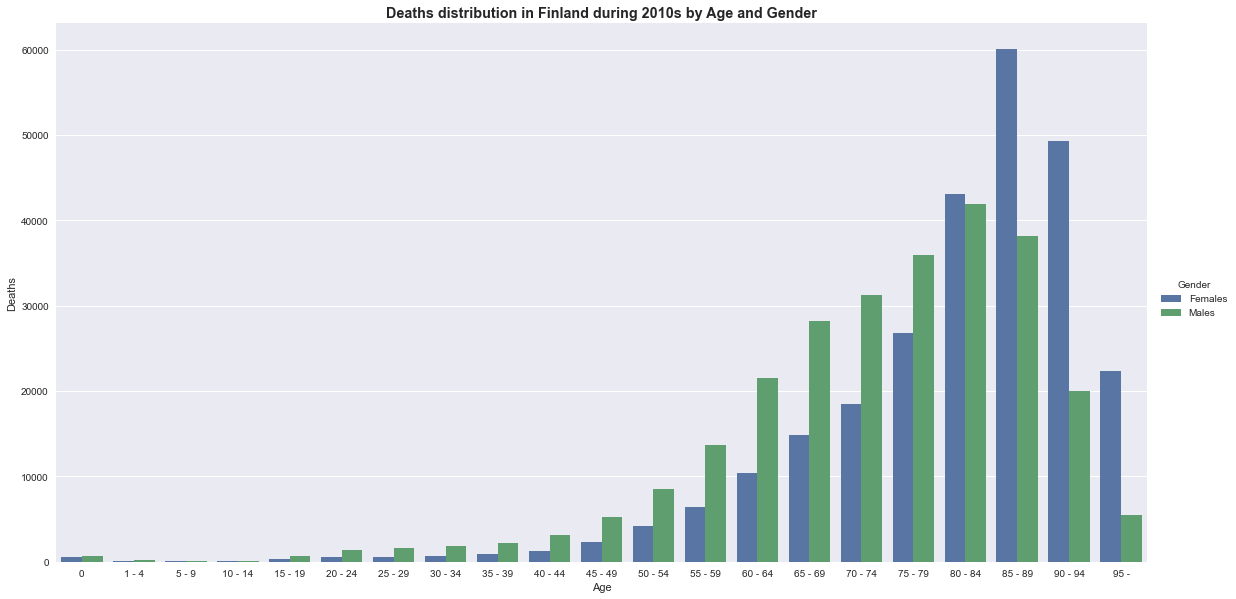

In [11]:
sns.catplot(x='Age', y='Deaths', hue='Gender', hue_order=['Females', 'Males'], data=df, kind='bar', height=8, aspect=2, estimator=sum, ci=None)
plt.title('Deaths distribution in Finland during 2010s by Age and Gender', fontsize='x-large', weight='bold')

#### 2.3.2 Findings

**Mode of Age**
- Females: 85 - 89 (60 087 deaths)
- Males: 80 - 84 (41 967 deaths)
- Total: 85 - 89 (98 314 deaths)

**Remarkable findings**
- Males consist the majority in *each* age category *younger* than 80 years old. Majority is significant among working-age categories (ages between 15 - 64).
- Females consist the majority in *each* age category *older* than 80 years old. Majority is significant among people over 85 years old. 

### 2.4 Causes of death in Finland during 2010s - Trend Analysis

#### 2.4.1 Pivot table - highest growth

In [12]:
# Create pivot table containing columns for Absolute change and Pct change in Cause of Deaths
df_growth = df.pivot_table(index=['Cause_of_death'], columns=['Year'], values='Deaths', aggfunc='sum')
df_growth['Absolute_change'] = df_growth[2019] - df_growth[2010]
df_growth['Pct_change'] = round(df_growth['Absolute_change'] / df_growth[2010] * 100, 2)

In [13]:
# Fastest growing causes of death in 2010s (absolute growth)
df_growth.nlargest(10, columns='Absolute_change')

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Absolute_change,Pct_change
Cause_of_death,,,,,,,,,,,,
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",6057,6200,7056,7543,8116,8580,9175,9390,10120,10153,4096,67.62
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",2443,2492,2642,2771,2946,3089,3268,3417,3565,3957,1514,61.97
26 Other diseases of the nervous system and sense organs excl. alcohol-related,1280,1272,1459,1368,1645,1624,1699,1785,1872,1933,653,51.02
21 Other malignant neoplasms,1624,1681,1683,1752,1745,1796,1818,1896,1883,1931,307,18.90
10 Malignant neoplasm of pancreas (C25),995,1005,1029,1025,1080,1137,1191,1168,1298,1199,204,20.50
31 Influenza (J09-J11),9,35,43,40,45,134,230,256,436,185,176,1955.56
"07 Malignant neoplasm of colon (C18, C19)",759,772,794,806,821,821,884,909,869,919,160,21.08
"20 Malignant neoplasm of lymphoid, haematopoietic and related tissue (C81-C96)",1069,1104,1074,1143,1177,1165,1111,1144,1119,1227,158,14.78
09 Primary malignant neoplasm of liver and intrahepatic bile ducts (C22),429,423,484,453,489,509,527,543,533,572,143,33.33


#### 2.4.2 Line chart - highest growth

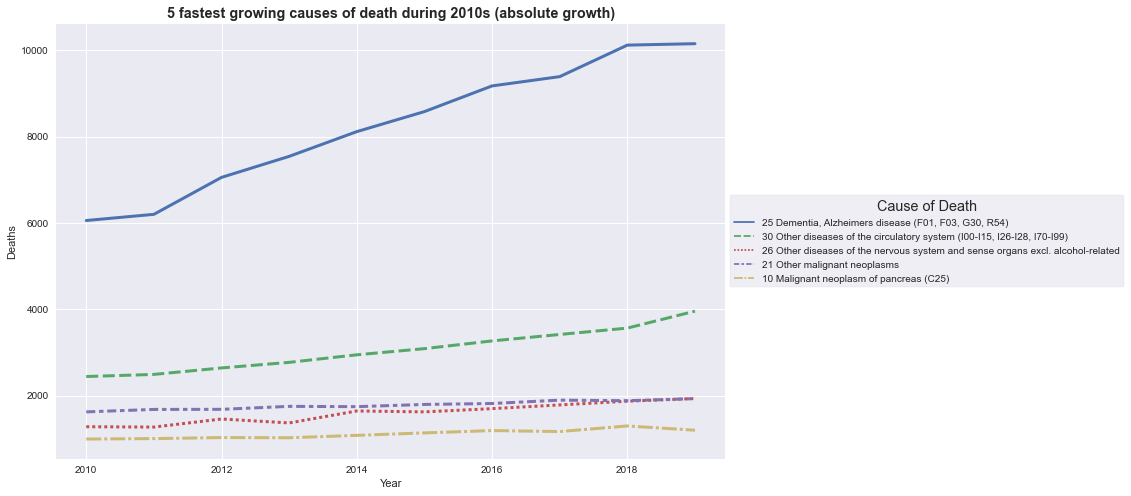

In [20]:
# Filter dataframe by fastest growing causes of death
top_abs_growth = df_growth.nlargest(5, columns='Absolute_change').index.tolist()
data = df[df.Cause_of_death.isin(top_abs_growth)].sort_values(by='Deaths', ascending=False)

# Lineplot highest growing causes of death (absolute value)
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=data, x='Year', y='Deaths', hue='Cause_of_death', style='Cause_of_death', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Cause of Death", title_fontsize='x-large')
plt.title('5 fastest growing causes of death during 2010s (absolute growth)', fontsize='x-large', weight='bold')

#### 2.4.3 Pivot table - highest decline

In [15]:
# Fastest declining causes of death on 2010s (absolute value)
df_growth.nsmallest(10, columns='Absolute_change')

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Absolute_change,Pct_change
Cause_of_death,,,,,,,,,,,,
27 Ischaemic heart diseases (I20-I25),11767,11169,11099,10552,10337,10209,10183,9861,9453,8630,-3137,-26.66
"32 Pneumonia (J12-J18, J849)",448,376,308,286,204,157,174,120,106,86,-362,-80.80
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",2030,2150,1971,1806,1844,1768,1836,1755,1766,1689,-341,-16.80
29 Cerebrovascular diseases (I60-I69),4235,4346,4498,4419,4428,4299,4378,4044,4043,3991,-244,-5.76
41 Alcohol-related diseases and accidental poisoning by alcohol,1962,1889,1960,1926,1841,1666,1730,1558,1683,1718,-244,-12.44
37 Diseases of the genitourinary system (N00-N99),419,408,369,373,315,282,248,207,232,198,-221,-52.74
"50 Suicides (X60-X84, Y870)",954,912,873,887,789,731,787,824,810,746,-208,-21.80
"03 Other infectious and parasitic diseases (A00-A09, A20-B19, B25-B89, B91-B99)",381,340,250,277,267,225,221,245,210,178,-203,-53.28
42 Land traffic accidents,254,259,206,235,201,232,212,198,199,174,-80,-31.50


#### 2.4.4 Line chart - highest decline

Text(0.5, 1.0, '5 fastest declining causes of death during 2010s (absolute value)')

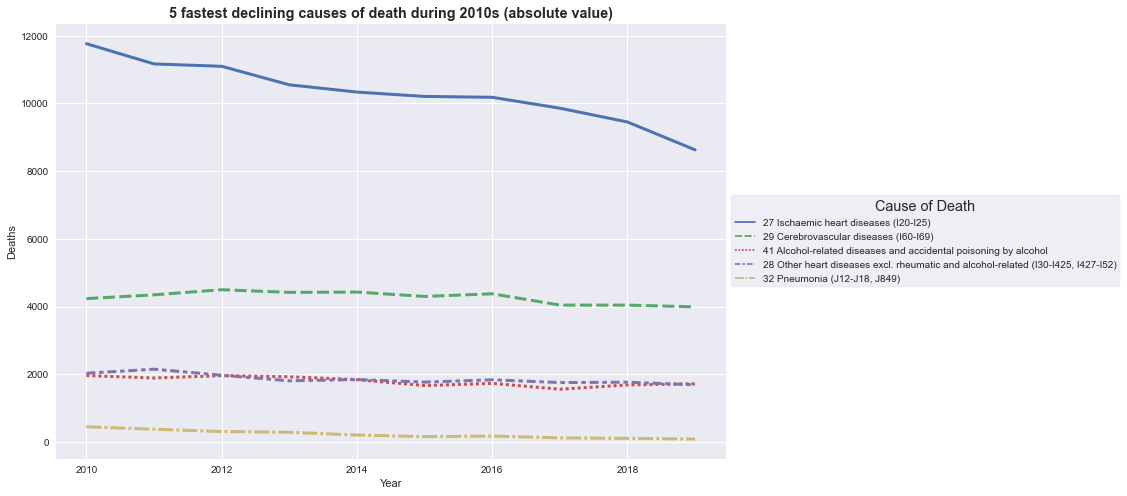

In [22]:
# Filter dataframe by fastest declining causes of death
top_abs_growth = df_growth.nsmallest(5, columns='Absolute_change').index.tolist()
data = df[df.Cause_of_death.isin(top_abs_growth)].sort_values(by='Deaths', ascending=False)

# Lineplot highest growing causes of death (absolute value)
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=data, x='Year', y='Deaths', hue='Cause_of_death', style='Cause_of_death', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Cause of Death", title_fontsize='x-large')
plt.title('5 fastest declining causes of death during 2010s (absolute value)', fontsize='x-large', weight='bold')

#### 2.4.5 Findings

**Fastest growing causes of death (absolute growth)**
1. Dementia, Alzheimers disease
2. Other diseases of the circulatory system 
3. Other diseases of the nervous system and sense organs excl. alcohol-related
4. Other malignant neoplasms
5. Malignant neoplasm of pancreas

**Fastest declining causes of death (absolute decline)**
1. Ischaemic heart disease
2. Pneumonia 
3. Other heart diseases excl. rheumatic and alcohol-related
4. Cerebrovascular diseases 
5. Alcohol-related diseases and accidental poisoning by alcohol

**Remarkable findings**
- Both absolute and percentual growth of __*Dementia, Alzheimers disease*__ has been significant.
- __*Influenza*__ has the highest percentual growth.
- Deaths caused by __*Alcohol-related diseases and accidental poisoning by alcohol*__, __*Suicides*__, and __*Land traffic accidents*__ has been declining during the 2010s. 

## 3. Summary
**Most common causes of death in Finland during 2010s**
1. Ischaemic heart diseases
2. Dementia, Alzheimers disease 
3. Cerebrovascular diseases 
4. Other diseases of the circulatory system
5. Malignant neoplasm of larynx, trachea, bronchus and lung

- __*Ischaemic heart diseases*__ was the most common cause of death in Finland until year 2018. __*Dementia, Alzheimers disease*__ has been increasing cause of death during the whole decade and it become most common cause of death in 2018. 

**Differences between genders**

- There is a significant difference between males and females regarding age distribution of deaths. Males consist remarkable majority of deaths in working-age group and they are majority in each age group younger than 80 years old.

- Deaths caused by __*Dementia, Alzheimers disease*__ are significantly more common among females than males.

- Deaths caused by __*Alcohol-related diseases and accidental poisoning by alcohol*__ and __*Malignant neoplasm of larynx, trachea, bronchus and lung*__ are significantly more common among males than females.

**Trend analysis**
- There is significant trend regarding two most common causes of death in Finland: __*Ischaemic heart diseases*__ and __*Dementia, Alzheimers disease*__. Deaths caused by __*Ischaemic heart diseases*__ has been declining significantly while deaths caused by __*Dementia, Alzheimers disease*__ has been increasing. 

- Deaths caused by __*Influenza*__ has the highest percentual growth and __*Dementia, Alzheimers disease*__ has highest absolute growth.

- Deaths caused by __*Alcohol-related diseases and accidental poisoning by alcohol*__, __*Suicides*__, and __*Land traffic accidents*__ has been declining during the 2010s. 

## References
Official Statistics of Finland (OSF): Causes of death  
Access method: http://pxnet2.stat.fi/PXWeb/api/v1/en/StatFin/ter/ksyyt/statfin_ksyyt_pxt_11bs.px